In [ ]:
long_string_multi_line = """multiline"""
print('long_string_multi_line')

long_string_multi_line


**DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING**

## 1. Data Exploration and Preprocessing:

•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!pip install pandas==1.5.3

!pip install ppscore

In [ ]:
df = pd.read_csv('/content/adult_with_headers.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.shape# count of row and coloumn

(32561, 15)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
df.info()# Display basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Summary statistics for categorical features
print("\nSummary Statistics for Categorical Features:")
print(df.describe(include=[object]))


Summary Statistics for Categorical Features:
       workclass education       marital_status       occupation relationship   
count      32561     32561                32561            32561        32561  \
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          race    sex  native_country  income  
count    32561  32561           32561   32561  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27816  21790           29170   24720  


In [ ]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.isnull().sum()# Checking for missing values

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
print(df.duplicated().sum())

24


In [ ]:
df.nunique()# Checking for unique values in each column

,0
age,73
workclass,9
fnlwgt,21648
education,16
education_num,16
marital_status,7
occupation,15
relationship,6
race,5
sex,2


•	Handle missing values as per the best practices (imputation, removal, etc.).

In [ ]:
# Checking for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [ ]:
# Remove rows with any missing values
df_cleaned = df.dropna()

print("\nDataFrame after dropping rows with missing values:")
print(df_cleaned.info())


DataFrame after dropping rows with missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [ ]:
# Remove columns with any missing values
df_cleaned = df.dropna(axis=1)

print("\nDataFrame after dropping columns with missing values:")
print(df_cleaned.info())


DataFrame after dropping columns with missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [ ]:
df_cleaned.shape

(32561, 15)

In [ ]:

# Impute missing values in numerical columns with the mean
num_imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=[float, int]).columns] = num_imputer.fit_transform(df.select_dtypes(include=[float, int]))

print("\nDataFrame after imputing missing values in numerical features:")
print(df.info())


DataFrame after imputing missing values in numerical features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  float64
 5   marital_status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital_gain    32561 non-null  float64
 11  capital_loss    32561 non-null  float64
 12  hours_per_week  32561 non-null  float64
 13  native_country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB
None


In [ ]:
# Impute missing values in numerical columns with the median
num_imputer = SimpleImputer(strategy='median')
df[df.select_dtypes(include=[float, int]).columns] = num_imputer.fit_transform(df.select_dtypes(include=[float, int]))

print("\nDataFrame after imputing missing values in numerical features (Median):")
print(df.info())


DataFrame after imputing missing values in numerical features (Median):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  float64
 5   marital_status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital_gain    32561 non-null  float64
 11  capital_loss    32561 non-null  float64
 12  hours_per_week  32561 non-null  float64
 13  native_country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB
N

In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[df.select_dtypes(include=[object]).columns] = cat_imputer.fit_transform(df.select_dtypes(include=[object]))

print("\nDataFrame after imputing missing values in categorical features:")
print(df.info())


DataFrame after imputing missing values in categorical features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  float64
 5   marital_status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital_gain    32561 non-null  float64
 11  capital_loss    32561 non-null  float64
 12  hours_per_week  32561 non-null  float64
 13  native_country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB
None


•	Apply scaling techniques to numerical features:

•	Standard Scaling

•	Min-Max Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [ ]:
numerical_features = df.select_dtypes(include=[float, int]).columns
print("Numerical Features:")
print(numerical_features)

Numerical Features:
Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [ ]:
# Applying Standard Scaling
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()  # Create a copy of the original DataFrame
df_standard_scaled[numerical_features] = standard_scaler.fit_transform(df[numerical_features])

# Display the first few rows of the scaled data
print("\nData after Standard Scaling:")
print(df_standard_scaled[numerical_features].head())


Data after Standard Scaling:
        age    fnlwgt  education_num  capital_gain  capital_loss   
0  0.030671 -1.063611       1.134739      0.148453      -0.21666  \
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  
3       -0.035429  
4       -0.035429  


In [ ]:
# Applying Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = df.copy()  # Create a copy of the original DataFrame
df_min_max_scaled[numerical_features] = min_max_scaler.fit_transform(df[numerical_features])

# Display the first few rows of the scaled data
print("\nData after Min-Max Scaling:")
print(df_min_max_scaled[numerical_features].head())


Data after Min-Max Scaling:
        age    fnlwgt  education_num  capital_gain  capital_loss   
0  0.301370  0.044302       0.800000       0.02174           0.0  \
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours_per_week  
0        0.397959  
1        0.122449  
2        0.397959  
3        0.397959  
4        0.397959  


In [ ]:
# Display summary statistics of the scaled features
print("\nSummary Statistics after Standard Scaling:")
print(df_standard_scaled[numerical_features].describe())

print("\nSummary Statistics after Min-Max Scaling:")
print(df_min_max_scaled[numerical_features].describe())


Summary Statistics after Standard Scaling:
                age        fnlwgt  education_num  capital_gain  capital_loss   
count  3.256100e+04  3.256100e+04   3.256100e+04  3.256100e+04  3.256100e+04  \
mean  -2.705915e-17 -1.001625e-16   1.471887e-16  1.309314e-17  1.016900e-16   
std    1.000015e+00  1.000015e+00   1.000015e+00  1.000015e+00  1.000015e+00   
min   -1.582206e+00 -1.681631e+00  -3.529656e+00 -1.459205e-01 -2.166595e-01   
25%   -7.757679e-01 -6.816910e-01  -4.200596e-01 -1.459205e-01 -2.166595e-01   
50%   -1.159546e-01 -1.082193e-01  -3.136003e-02 -1.459205e-01 -2.166595e-01   
75%    6.904838e-01  4.478765e-01   7.460392e-01 -1.459205e-01 -2.166595e-01   
max    3.769612e+00  1.226856e+01   2.300838e+00  1.339458e+01  1.059351e+01   

       hours_per_week  
count    3.256100e+04  
mean    -1.549355e-17  
std      1.000015e+00  
min     -3.194030e+00  
25%     -3.542945e-02  
50%     -3.542945e-02  
75%      3.695194e-01  
max      4.742967e+00  

Summary Statistics

•	Discuss the scenarios where each scaling technique is preferred and why.

In [ ]:
#Standard Scaling: Useful when the features follow a normal distribution. It's particularly important for algorithms like Support Vector Machines (SVM) or Principal Component Analysis (PCA), where data centering around zero is crucial.

#Min-Max Scaling: Ideal when you need to maintain the relative relationships between the features. This scaling is often used when the distribution of data is not Gaussian and especially when using algorithms like neural networks or k-nearest neighbors (KNN).

## 2. Encoding Techniques:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  float64
 5   marital_status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital_gain    32561 non-null  float64
 11  capital_loss    32561 non-null  float64
 12  hours_per_week  32561 non-null  float64
 13  native_country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


•	Apply One-Hot Encoding to categorical variables with less than 5 categories.

In [ ]:
# Identify categorical features
categorical_features = df.select_dtypes(include=[object]).columns
# Determine the number of unique categories for each categorical feature
unique_values_count = df[categorical_features].nunique()
# Categorize features based on the number of unique categories
one_hot_features = unique_values_count[unique_values_count < 5].index.tolist()
print("One-Hot Encoding will be applied to:", one_hot_features)

One-Hot Encoding will be applied to: ['sex', 'income']


•	Use Label Encoding for categorical variables with more than 5 categories.

In [ ]:
label_features = unique_values_count[unique_values_count >= 5].index.tolist()
print("Label Encoding will be applied to:", label_features)

Label Encoding will be applied to: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']


•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

**One-Hot Encoding:**

*Pros:*

No Assumptions about Order: One-Hot Encoding doesn't assume any inherent order in the categories, making it suitable for nominal categorical data.
Compatibility with Many Models: It works well with algorithms that do not handle categorical data natively, such as linear regression and SVMs.

*Cons:*

Increased Dimensionality: The major drawback is that it increases the dimensionality of the data, especially if the categorical variable has many unique categories.
Sparsity: One-Hot Encoding creates sparse matrices, which can lead to increased computational cost.


**Label Encoding:**

*Pros:*

Simpler Representation: Label Encoding transforms categorical data into a single integer value per category, keeping the dataset's dimensionality unchanged.
Efficiency: It's memory-efficient and computationally light, as it doesn't create new columns.

*Cons:*

Assumption of Ordinal Relationships: Label Encoding imposes an ordinal relationship between categories, which might not be appropriate for nominal categorical data.
Risk of Misinterpretation: Some algorithms may mistakenly interpret the encoded values as having a natural order, which could distort model performance.

## 3. Feature Engineering:

•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

In [ ]:
# Feature 1: Net Capital Gain
df['Net_Capital_Gain'] = df['capital_gain'] - df['capital_loss']

# Feature 2: Higher Education Indicator
# Assuming 'education_num' >= 10 represents higher education (adjust threshold as needed)
df['Higher_Education'] = df['education_num'].apply(lambda x: 1 if x >= 10 else 0)

# Display the first few rows to check the new features
print("First few rows with new features:")
print(df[['capital_gain', 'capital_loss', 'Net_Capital_Gain', 'education', 'education_num', 'Higher_Education']].head())

First few rows with new features:
   capital_gain  capital_loss  Net_Capital_Gain   education  education_num   
0        2174.0           0.0            2174.0   Bachelors           13.0  \
1           0.0           0.0               0.0   Bachelors           13.0   
2           0.0           0.0               0.0     HS-grad            9.0   
3           0.0           0.0               0.0        11th            7.0   
4           0.0           0.0               0.0   Bachelors           13.0   

   Higher_Education  
0                 1  
1                 1  
2                 0  
3                 0  
4                 1  


Rationale Behind New Features:

>Capital Gain/Loss Ratio: By creating a ratio between capital gain and loss, the feature directly reflects the financial situation of an individual. Those with higher ratios might be in better financial positions, potentially correlating with higher income levels.

>Full-Time Indicator: Working more than 40 hours a week might indicate a higher income potential, as full-time workers typically earn more than part-time workers. This binary feature simplifies the interpretation for the model.

•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

If the capital-gain feature is heavily skewed, applying a log transformation can make it more normally distributed, which is beneficial for many machine learning algorithms.

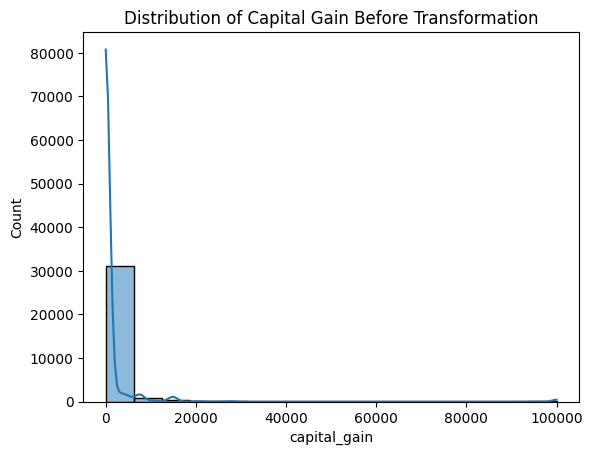

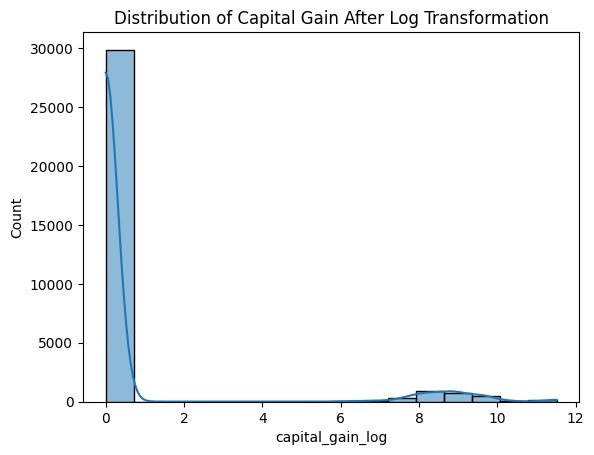

In [ ]:
# Check the distribution of the 'capital_gain' feature
sns.histplot(df['capital_gain'], kde=True)
plt.title('Distribution of Capital Gain Before Transformation')
plt.show()

# Apply log transformation to 'capital_gain'
df['capital_gain_log'] = np.log1p(df['capital_gain'])  # Use np.log1p to handle zero values

# Check the distribution after transformation
sns.histplot(df['capital_gain_log'], kde=True)
plt.title('Distribution of Capital Gain After Log Transformation')
plt.show()

# Justification:
# The log transformation is applied to the 'capital_gain' feature if it exhibits a right-skewed distribution.
# This transformation compresses the higher values, reducing the skewness and potentially making the feature
# more normally distributed. Many machine learning algorithms assume normality for optimal performance,
# so this transformation can improve model accuracy.


## 4. Feature Selection:

•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.

In [ ]:

# Initialize Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05)  # Adjust contamination as needed

# Fit the model to the numerical features
isolation_forest.fit(df[numerical_features])

# Get outlier predictions
outlier_predictions = isolation_forest.predict(df[numerical_features])

# Filter the DataFrame to remove outliers
df_no_outliers = df[outlier_predictions == 1]

print("Shape of DataFrame before removing outliers:", df.shape)
print("Shape of DataFrame after removing outliers:", df_no_outliers.shape)

# Discussion on Outliers:
# Outliers can significantly affect model performance by:
# - Biasing Model Parameters: Outliers can disproportionately influence the model's parameters, leading to inaccurate predictions for the majority of the data.
# - Increasing Error Variance: Outliers can increase the variance of errors, making it harder for the model to generalize to new data.
# - Affecting Model Assumptions: Some models assume normality or homoscedasticity, which outliers can violate.


Shape of DataFrame before removing outliers: (32561, 18)
Shape of DataFrame after removing outliers: (30933, 18)


•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

In [ ]:
#install the package
!pip install -U ppscore

In [ ]:
import ppscore as pps

ContextualVersionConflict: (pandas 2.1.4 (/usr/local/lib/python3.10/dist-packages), Requirement.parse('pandas<2.0.0,>=1.0.0'), {'ppscore'})

In [ ]:
# Calculate the Predictive Power Score matrix
pps_matrix = pps.matrix(df_no_outliers)

# Display the PPS matrix
print("\nPredictive Power Score Matrix:")
print(pps_matrix)

# Calculate the correlation matrix
correlation_matrix = df_no_outliers.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Discussion on PPS vs. Correlation:
# - Predictive Power Score (PPS): Measures the ability of one feature to predict another, considering both linear and non-linear relationships. It ranges from 0 (no predictive power) to 1 (perfect predictive power).
# - Correlation: Measures the linear relationship between two features. It ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation).

# Comparing PPS and Correlation:
# - PPS can capture non-linear relationships that correlation might miss.
# - PPS is asymmetric, meaning the predictive power of feature A on feature B might be different from the predictive power of feature B on feature A.
# - Correlation is symmetric.

# Example:
# - If PPS shows a high score for feature X predicting feature Y, but the correlation is low, it suggests a non-linear relationship between the features.

# Analyzing the PPS matrix and correlation matrix together provides a more comprehensive understanding of the relationships between features.


ContextualVersionConflict: (pandas 2.1.4 (/usr/local/lib/python3.10/dist-packages), Requirement.parse('pandas<2.0.0,>=1.0.0'), {'ppscore'})